In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
cars = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Car details.csv')
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [62]:
cars.shape

(8128, 13)

In [63]:
cars.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [64]:
cars = cars.dropna(how= 'any')
cars.shape

(7906, 13)

In [65]:
import re

In [66]:
res = '190Nm@ 2,000rpm'.replace(".","")
res = res.replace(",","")
a = [int(s) for s in re.findall(r'\d+',res)]
a

[190, 2000]

In [67]:
torque_list = cars['torque'].to_list()
torque_rpm=[]
def extractingRPM(x):
  for item in x:
    res = item.replace(".","")
    res = res.replace(",","")
    temp = [int(s) for s in re.findall(r'\d+',res)]
    torque_rpm.append(max(temp))

extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])




['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [68]:
cars['torque_rpm'] = torque_rpm
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


In [69]:
mil_list = cars['mileage'].to_list()
mil_kmpl = []

def extractingmil(x):
  for item in x:
    temp=[]
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    mil_kmpl.append(max(temp))

extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [70]:
cars['mil_kmpl'] = mil_kmpl
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14


In [71]:
engine_list= cars['engine'].to_list()
engine_cc= []

def extractingEngine(x):
  for item in x:
    temp=[]
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    engine_cc.append(max(temp))


extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [72]:
cars['engine_cc']= engine_cc
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0


In [73]:
power_list= cars['max_power'].to_list()
max_power= []
def extractingPower(x):
  for item in x:
    temp=[]
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    max_power.append(max(temp))
extractingPower(power_list)
print(power_list[:2])
print(max_power[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [75]:
cars['max_power_new']= max_power
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,21.14,1498.0,103.52


In [76]:
cars_new= cars.drop(['mileage','engine','max_power','torque'],axis=1)
cars_new.describe()

,year,selling_price,km_driven,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3474.631419,19.419861,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,2579.612132,4.036263,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,0.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2500.000000,16.780000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,19.300000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,22.320000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,43639.000000,42.000000,3604.000000,400.000000


<Axes: >

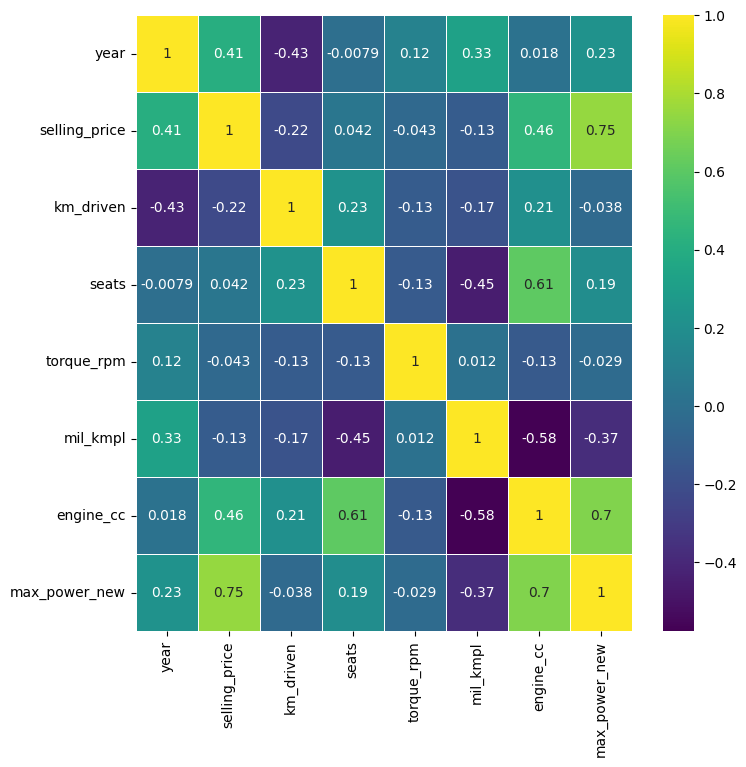

In [77]:
plt.figure(figsize=(8,8))
# Sadece sayısal sütunları seçin
numeric_data = cars_new.select_dtypes(include=['number'])
# Korelasyon matrisi oluştur ve görselleştir
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis', linewidths=.5)


In [ ]:
#We can see there is high correlation of selling price(which we will be predicting) with max_power output of the car
#The values of correlation are pretty averaged out meaning we wont be excluding any clumn as each column is able to provide us with new
#information that is not provided by any other column.

In [78]:
cars_new['fuel'].value_counts()

,count
fuel,
Diesel,4299
Petrol,3520
CNG,52
LPG,35


In [79]:
cars_new['seller_type'].value_counts()

,count
seller_type,
Individual,6563
Dealer,1107
Trustmark Dealer,236


In [80]:
cars_new['transmission'].value_counts()

,count
transmission,
Manual,6865
Automatic,1041


In [81]:
cars_new['owner'].value_counts()

,count
owner,
First Owner,5215
Second Owner,2016
Third Owner,510
Fourth & Above Owner,160
Test Drive Car,5


In [82]:
#Converting categorical data to integer format.
def ref1(x):
  if x == 'Manual':
    return 1
  else:
    return 0
cars_new['transmission']= cars_new['transmission'].map(ref1)

In [83]:
def ref2(x):
  if x == 'Individual':
    return 1
  elif x== 'Dealer':
    return 0
  else:
    return -1
cars_new['seller_type']= cars_new['seller_type'].map(ref2)

In [84]:
def ref3(x):
  if x=='Petrol':
    return 1
  elif x=='Diesel':
    return 0
  elif x=='CNG':
    return -1
  else:
    return -2
cars_new['fuel']= cars_new['fuel'].map(ref3)


In [85]:
owners = pd.get_dummies(cars_new['owner'])
X= pd.concat([cars_new,owners],axis=1)

In [86]:
X.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,mil_kmpl,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,First Owner,5.0,2000,23.40,1248.0,74.00,True,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,Second Owner,5.0,2500,21.14,1498.0,103.52,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,Third Owner,5.0,2700,17.70,1497.0,78.00,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,First Owner,5.0,2750,23.00,1396.0,90.00,True,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,First Owner,5.0,4500,16.10,1298.0,88.20,True,False,False,False,False


In [87]:
y=X['selling_price']
X=X.drop(['selling_price','name','owner'],axis=1)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA


In [89]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X[:3000],y[:3000],test_size=0.2)

In [90]:
random_model=RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)


In [92]:
random_model.fit(Xtrain,ytrain)

y_pred=random_model.predict(Xtest)

random_model_accuracy = round(random_model.score(Xtrain,ytrain)*100,2)
print(round(random_model_accuracy,2), '%')



99.05 %


In [93]:
random_model_accuracy1 = round(random_model.score(Xtest,ytest)*100,2)
print(round(random_model_accuracy1,2), '%')

95.72 %


In [94]:
reg = LinearRegression()
reg.fit(Xtrain,ytrain)


LinearRegression()

In [96]:
print(round(reg.score(Xtrain,ytrain),2))

0.69


In [97]:
import pickle
saved_model= pickle.dump(random_model, open('/content/drive/My Drive/Colab Notebooks/CarSelling.pickle','wb'))